In [1]:
# pip install transformers

In [2]:
%%capture
from transformers import pipeline

In [8]:
import datetime
from psaw import PushshiftAPI

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np

import seaborn as sns
sns.set()

import json

%matplotlib inline

## Sentiment Classifier

In [4]:
classifier = pipeline('sentiment-analysis')

## Load Tweets

In [11]:
all_tweets = list(open('../Server/app/data/twitter.json'))
tweets = [json.loads(t) for t in all_tweets]
tweets = [t['tweet'] for t in tweets]

### let's see a sample tweet with its score

In [14]:
tweets[0]

'no ps5✅ no good morning text✅ no cranberry juice ✅ no bitches✅ no reason to live✅'

In [18]:
classifier(tweets[0]) # oops!

[{'label': 'NEGATIVE', 'score': 0.9988693594932556}]

In [17]:
sentiment_results = classifier(tweets)

In [22]:
from collections import Counter 

In [25]:
counts = Counter([r['label'] for r in sentiment_results])

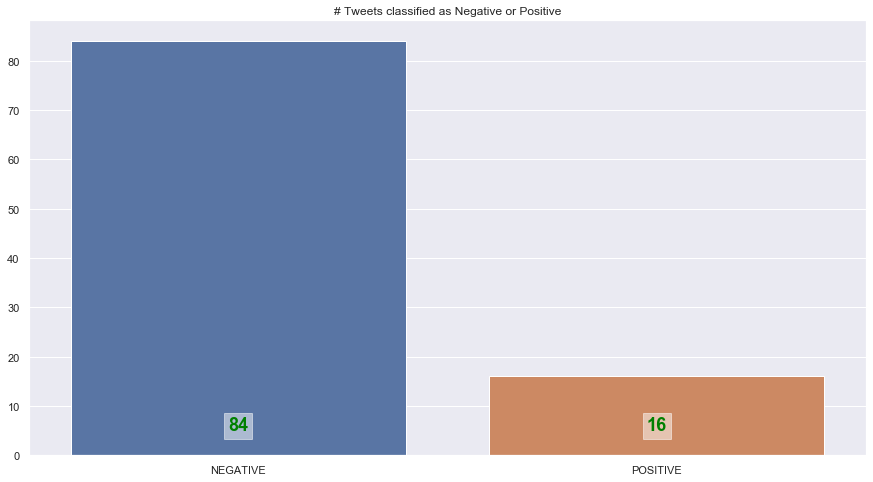

In [58]:
fig, ax = plt.subplots(figsize=(15,8))

ax = sns.barplot(x=['NEGATIVE', 'POSITIVE'], y=[counts['NEGATIVE'], counts['POSITIVE']], ax=ax)

ax.text(0, 5, str(counts['NEGATIVE']), color='green', fontweight='bold', fontsize=18, bbox=dict(facecolor='white', alpha=0.5), ha="center")
ax.text(1, 5, str(counts['POSITIVE']), color='green', fontweight='bold', fontsize=18, bbox=dict(facecolor='white', alpha=0.5), ha="center")

ax.set_title('# Tweets classified as Negative or Positive')
plt.show()